# Removing non-stationarity on time series: Eliminación de la estacionarieidad de en series de tiempo.

Consideramos dos tipos de variaciones:

* variacion en la media
* variacion en la varianza

## Como se elimina la variacion en la media.
### Tomando diferencias (el discreto de la diferenciacion o derivada).

Asuma que se tiene una funcion (en el continuo) $y=f(x)=cx+b$.
La pendiente es constante. Para obtener esta constante. Esta constante la podemos obtener mediante diferenciacion. Es decir

$$y' = \frac{dy}{dx} = c. $$
En el discreto, la implementacion numerica de esto se hace como

$$D_1 = y'(x) \approx \frac{f(x+\Delta x)-f(x)}{\Delta x}. $$

Si asumimos $\Delta x = 1$ y la funcion es lineal, se obtiene la pendiente exactamente. Veamos

$$ f(x+\Delta x) - f(x) = c(x + 1) +b - cx -b = c $$.
Es decir $D_1=c$.

Que pasa si la funcion es cuadratica. Es decir $y=f(x)=a x^2 + bx + c$. Una sola derivada no bastaria para convertir esta funcion en una constante. $y'=2 ax + b$. La primera derivada es lineal, pero como esta es lineal, una derivada mas produce una constante.
Para una funcion cuadratica, dos derivadas son suficientes para llegar a una constante. 

Se puede hacer esto de dos formas.

1. Aplicando la derivada dos veces. O sea aplicando la deriva a $y'=df/dx$. 
2. Usar el operador discreto (central) de segundo orden.

$$y''(x) \approx \frac{f(x+ \Delta x) - 2 f(x) + f(x-\Delta x)}{(\Delta x)^2}. $$

Como antes, si la funcion es cuadratica, basta con usar $\Delta x=1$ y obenemos el valor constante $2a$. Veamos esto

\begin{eqnarray}
D_2(f) &=& f(x + 1) - 2 f(x) + f(x-1) \\
&=& a(x+1)^2 + b(x+1) + c - 2(ax^2 + bx + c) + a(x-1)^2 + b(x-1) +c \\
&=& 2 ( a x^2 + bx +  c) - 2( ax^2 + bx + c) + b - b + a + a \\
&=& 2 a
\end{eqnarray}
Si la funcion es cuadratica el diferenciador finito de segundo orden $D_2$ produce exactamente la segunda derivada $2a$.

Necesitamos como **recobrar** la funcion original a partir de sus diferencias. 

Veamos esto como se hace.  En el caso de las primeras diferencias $D_1$. Sea  

Usando la notacion de series de tiempo:
$$W_t = X_t - X_{t-1} . \quad (1) $$
Si $W$ se calcula de esta forma entonces $X_t = W_t + X_{t-1}$.

De igual forma

$$D_2 =  X_{t-1} - 2X_t + X_{t+1}. \quad (2)$$

Escribamos estas diferencias usando el operador $B$. Observe la
ecuacion (1). Usando el operador $B$ escribimos

$$ W_t = (1 - B)X_t  \quad \text{diferencia de primer orden}$$
Observe la ecuacion (2)

$$ W_t = (1 - 2 B^2 + B) X_{t} = (1-B)^2 X_t$$.

Esto nos indica que si nuestra funcion (serie) es polinomica de orden $k$ podemos remover el polinomio hasta una constante con el operador

$$ D_{ki}(X_i) = (1-B)^k X_{t+i} . $$

Que significa el $i$ aca. Que no hay forma unica de hacer las diferencias. Por ejemplo

\begin{eqnarray}
(1 - B) X_t = X_t - X_{t-1} \\
(1-B)X_{t+1} = X_{t+1} - X_t
\end{eqnarray}

Excepto por el efecto de borde (lo vamos a ver numericamente) el resultado debe ser el mismo.

En el caso de la ecuacion primera de arriba podemos pensar en
$t=1,2, \cdots N$. Para la segunda ecuacion $t=0, 1, \cdots, N-1$.
En la primera el efecto de borde esta a la izquierda y en la segunda a la derecha. Cuando el orden del diferenciador ($k$) aumenta, aumenta el tamano de los bordes afectados.

### Como se recobra luego de hacer las diferencias.
* En el caso de las diferencias de primer orden tenemos

$$ W_t = X_t - X_{t-1}  \quad \text{que implica} \quad X_t = W_t + X_{t-1}  $$

* para el segundo orden

$$ W_t = X_{t-1} - 2 X_t + X_{t+1} \quad \text{lo que implica} \quad X_{t+1} = W_t + 2 X_t - X_{t-1} $$

Note que en el primer orden se requiere una condicion inicial $X_0$. En el caso de segundo orden se necesitan dos condiciones
iniciales $X_0, X_1$, y en el caso de orden $k$, se necesitan
$k$  condiciones iniciales (no muestro aca como recuperar el orden $k$), $X_0, X_1, \cdots, X_k$.

Ya tenemos la teoria para trabajar implementacioes numericas en Python. 

## Caso lineal sin ruido

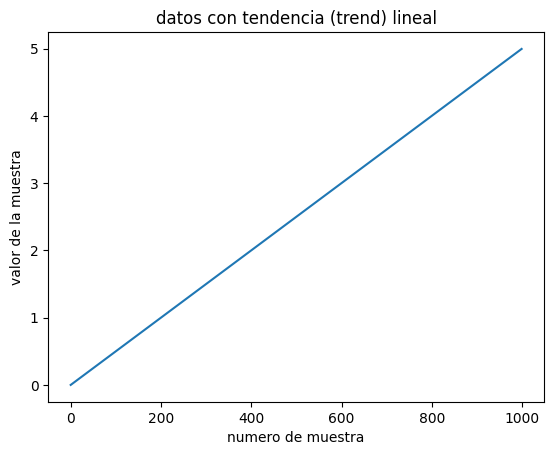

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a=0.5
N=1000

X = np.zeros(N)
for i in range(N):
    X[i] = a*i/100

# pendiente es 0.5/100 o 1/200
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos con tendencia (trend) lineal")
plt.plot(X)

### programamos la funcion ```diff```

In [3]:
def diff(X, o, interval=1):
    # X es la serie de tiempo
    # o es el orden 1,2, ...
    # interval es Delta X

    n = len(X)
    Y = np.zeros(n)

    if o==1:
        for i in range(interval, n):
            Y[i] = X[i] - X[i-interval]
    elif o==2:
        for i in range(interval, n-interval):
            Y[i]= X[i+interval] - 2 * X[i] + X[i-interval]
    else:
        print("error. Solo o=1,2, son validos")
        return

    return Y



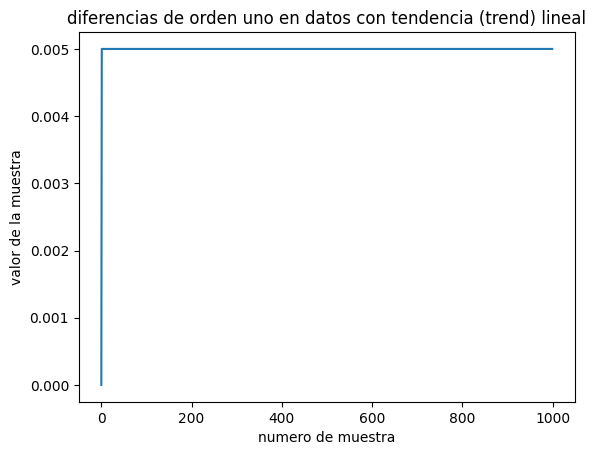

In [7]:
# probemos el algoritmo con los datos de arriba
Y = diff(X, 1)


# graficamos

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("diferencias de orden uno en datos con tendencia (trend) lineal")
plt.plot(Y)

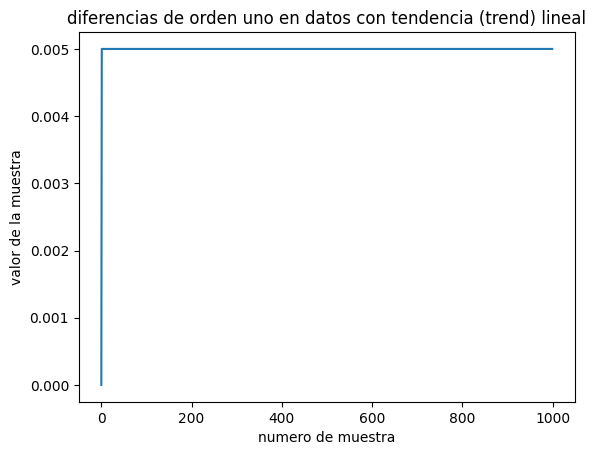

In [12]:
# probemos el algoritmo con los datos de arriba
Y = diff(X, 1)

# hagamos trampa y demos la condicion inical
# Y[0]=1/200.
# Y[0]=0.005

# graficamos

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("diferencias de orden uno en datos con tendencia (trend) lineal")
plt.plot(Y)

### Lineal con ruido

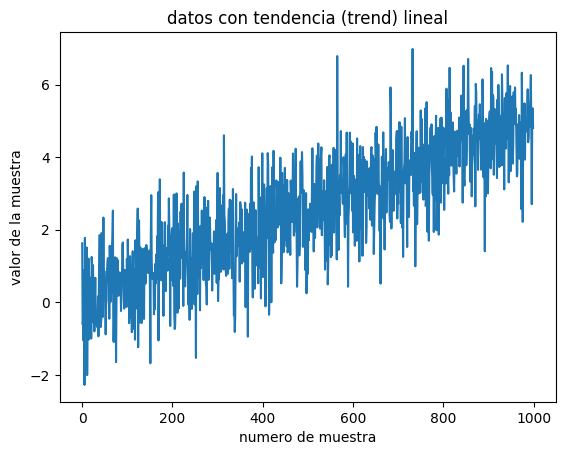

In [13]:
np.random.seed(1)
mu,sigma = 0, 1
N=1000
Z = np.random.normal(mu, sigma, N)
a=0.5

X = np.zeros(N)
for i in range(N):
    X[i] = Z[i] + a*i/100

# pendiente es 0.5/100 o 1/200
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos con tendencia (trend) lineal")
plt.plot(X)


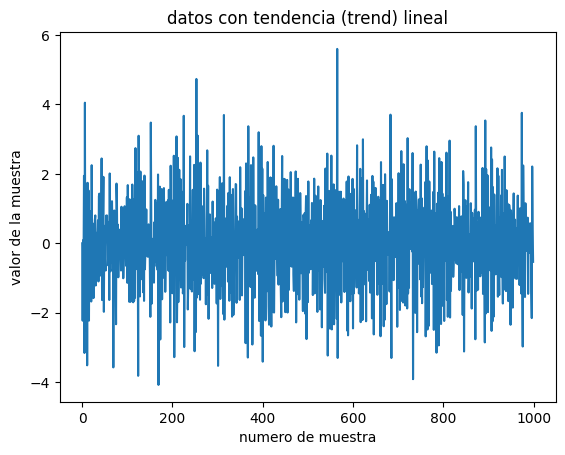

In [14]:
# removamos la tendencia lineal
Y = diff(X, 1)

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos con tendencia (trend) lineal")
plt.plot(Y)



## Caso cuadratico sin ruido

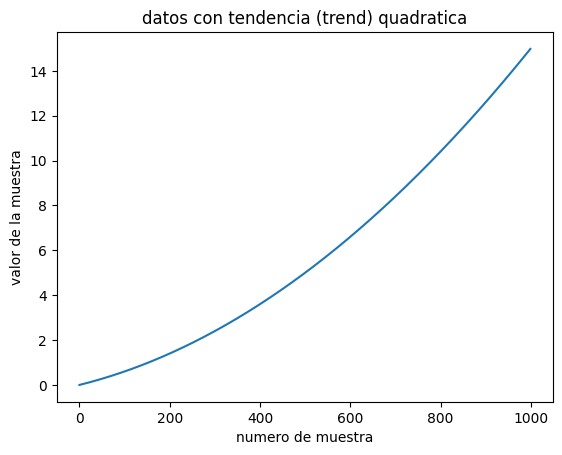

In [15]:
# a x^2 + bx + c
# c=0
a=0.5
b=0.1
c=0.0

W2 = np.zeros(N)
for i in range(N):
    W2[i] = a*i/100 + b*i**2/10000

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos con tendencia (trend) quadratica")
plt.plot(W2)

   

## removemos el efecto cuadratico

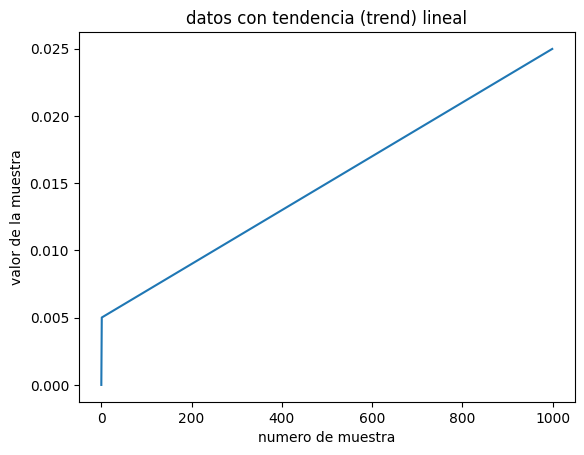

In [16]:
# que pasa si solo usamos orden 1
Y1 = diff(W2, 1)
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos con tendencia (trend) lineal")
plt.plot(Y1)



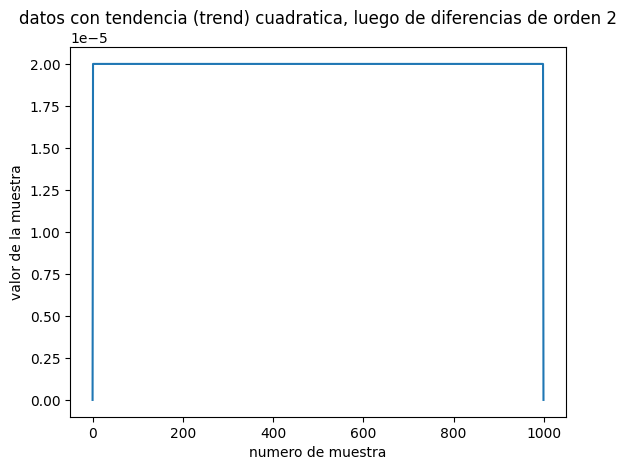

In [17]:
# podriamos aplicar otra lineal a estos datos, Y2= diff(Y1,1)
# o directamente la de orden 2 a los datos originales
# veamos esta ultima
Y2 = diff(W2, 2)

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos con tendencia (trend) cuadratica, luego de diferencias de orden 2")
plt.plot(Y2)



## Cuadratica con ruido

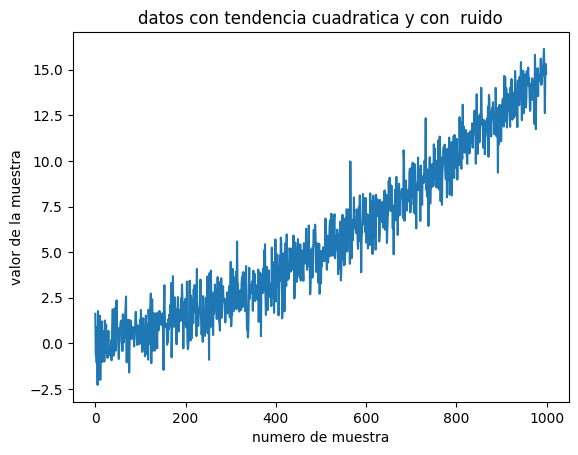

In [18]:
W2 = np.zeros(N)
for i in range(N):
    W2[i] = Z[i] + a*i/100 + b*i**2/10000

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos con tendencia cuadratica y con  ruido")
plt.plot(W2)



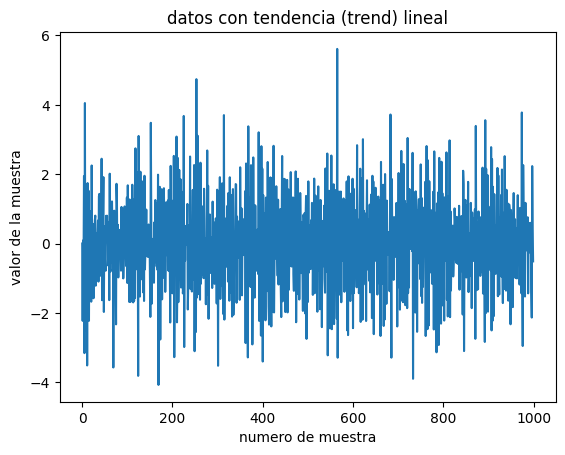

In [20]:
# removemos la tendencia cuadratica
# inicialmente diferencias de orden 1
Y1 = diff(W2, 1)

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos con tendencia (trend) lineal")
plt.plot(Y1)



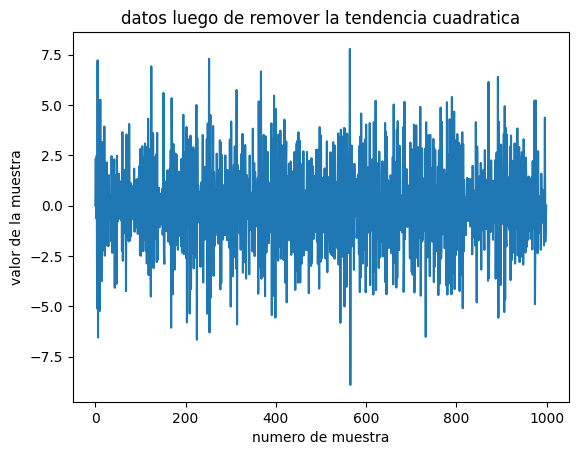

In [21]:
# no se ve la tendencia lineal, por que el ruido es mas grande que el incremento
# por pendiente
# tomemos la segunda derivada
Y2 = diff(W2, 2)

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("datos luego de remover la tendencia cuadratica")
plt.plot(Y2)



## Recuperacion de la señal luego de haber removido la tendencia
### Lineal con ruido

In [31]:
# del operador D1
W = np.zeros(N)

for i in range(N):
    W[i] = Z[i] + a*i/100

Y1 = diff(W,1) # primeras diferencias

# XR datos recobrados
X = np.zeros(N)

X[0] = W[0]  # condicion inicial. Trampa por que yo se la respuesta.
for i in range(1, N):
    X[i] = Y1[i] + X[i-1]

# el error maximo
print("error maximo en valor absoluto", max(abs(X-W)))

error maximo en valor absoluto 2.220446049250313e-15


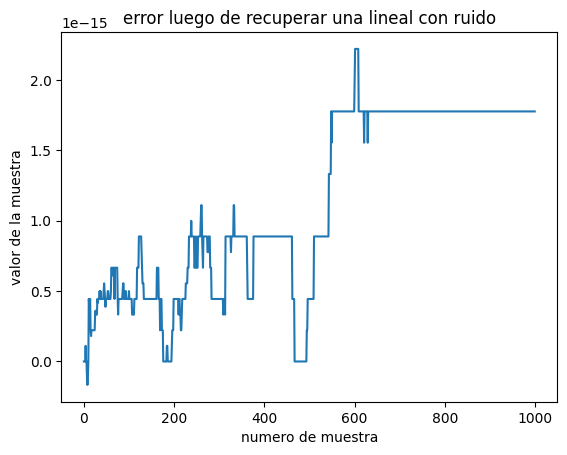

In [32]:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("error luego de recuperar una lineal con ruido")
plt.plot(X-W)



In [33]:
X[100]-W[100]

4.996003610813204e-16

### Recobrar cuadratica con ruido

In [37]:
W = np.zeros(N)
for i in range(N):
    W[i] = Z[i] + a*i/100 + b*i**2/10000

Y1 = diff(W,2)  # primer orden no es suficiente

# senal recobrada
X = np.zeros(N)

X[0]= W[0]  # condiciones iniciales, trampa
X[1] = W[1]

for i in range(1, N-1):
    X[i+1] = Y1[i] + 2*X[i] - X[i-1]

# el error maximo es
print("error maximo", max(abs(X-W)))

error maximo 1.1857181902996672e-11


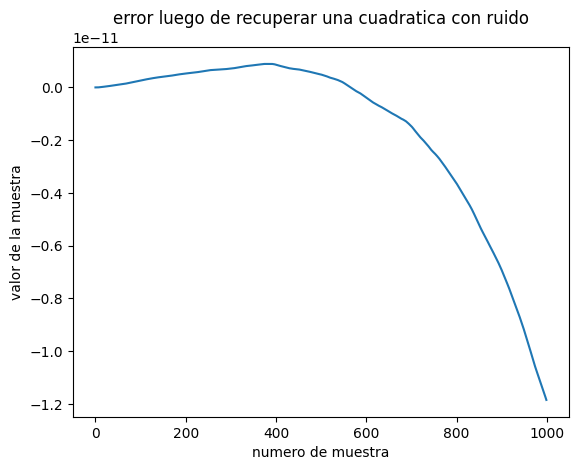

In [38]:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("error luego de recuperar una cuadratica con ruido")
plt.plot(X-W)

## Eliminacion del efecto "seasoning". "desestacionalización" o "ajuste estacional".
Asuma algo que tenga un periodo. Por ejemplo la funcion 
$\sin 12 x$, aca la frecuencia es 12, para el periodo podemos
pensar que 360 grados son un ciclo completo de la funcion seno.
$12 x = 360$, $x=30$ es el periodo.

### Sin ruido

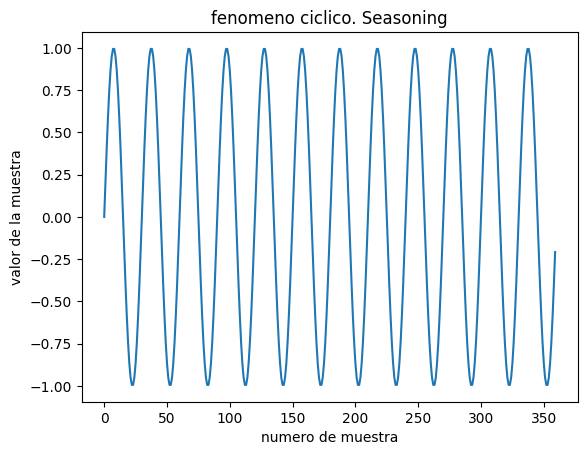

In [40]:
# todo lo que necesitamos esta importado
freq=12

X = [np.sin(np.radians(freq*i)) for i in range(360)]

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("fenomeno ciclico. Seasoning")
plt.plot(X)



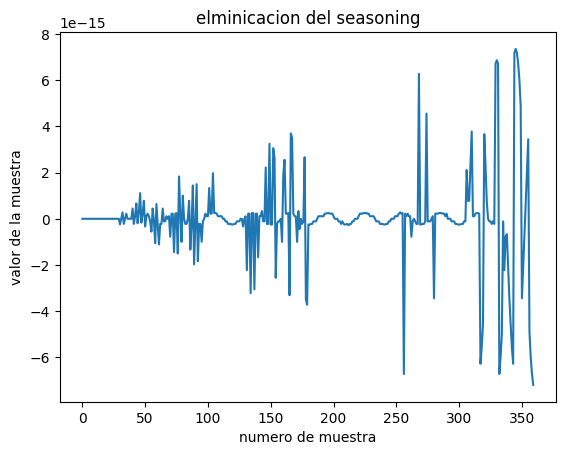

In [41]:
periodo=30
Y= diff(X, 1, 30) # observe que 30*12=360

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("elminicacion del seasoning")
plt.plot(Y)

### Con ruido

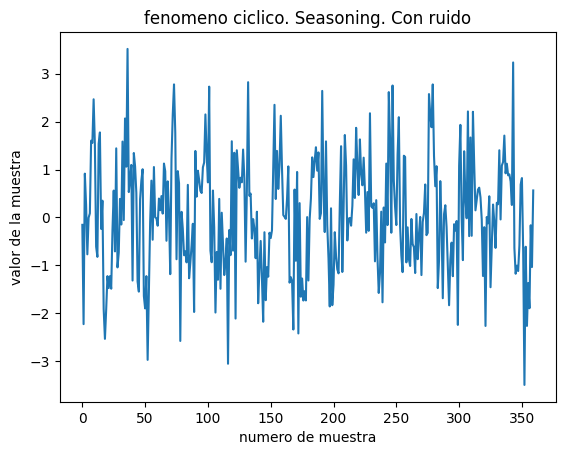

In [44]:
# todo lo que necesitamos esta importado
freq=12

N = len(X)
Z=np.random.normal(mu, sigma,N)

X = [np.sin(np.radians(freq*i)) for i in range(360)] + Z

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("fenomeno ciclico. Seasoning. Con ruido")
plt.plot(X)



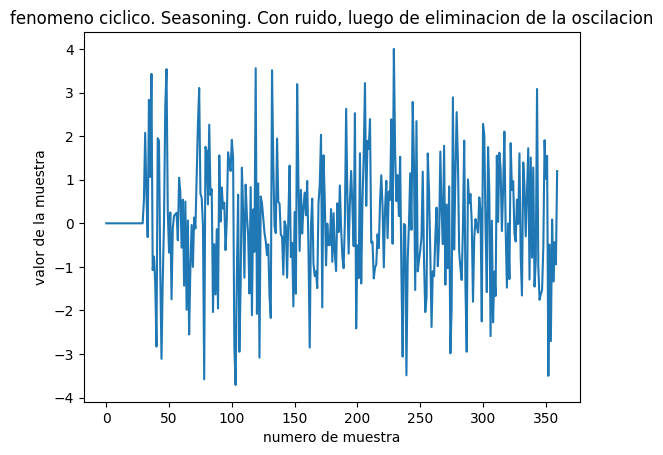

In [45]:
# eliminamos la oscilacion
interval=30 # periodo
Y = diff(X, 1, interval)

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("fenomeno ciclico. Seasoning. Con ruido, luego de eliminacion de la oscilacion")
plt.plot(Y)



### Recobro de la senal que fue filtrada para remover oscilacion


In [46]:
XR = np.zeros(N)

for i in range(interval):
    XR[i] = X[i]   # condiciones iniciales, trampa

for i in range(interval, N):
    XR[i] = Y[i] + XR[i-interval]

# error maximo
print("error maximo", max(abs(X-XR)))

error maximo 8.881784197001252e-16


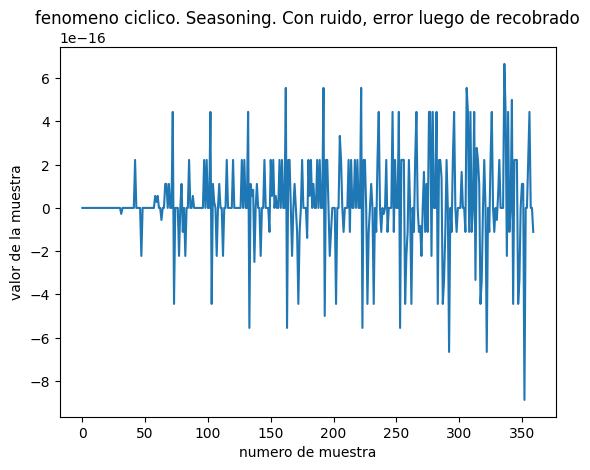

In [47]:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("fenomeno ciclico. Seasoning. Con ruido, error luego de recobrado")
plt.plot(X-XR)



Una nota antes de acabar.
*  **Tendencia deterministica**:  Es lo que hicimos en esta clase. Lo hicimos para funciones polinomicas. Si su serie de tiempo tiene la forma $X_t = \phi_1 X_{t-1} + Z_t + f(t)$, donde
$f(t)$ es una funcion conocida. Esta es una tendencia deterministica. Se puede remover la tendencia facilmente con restar $f(t)$ quedando asi un modelo AR(1), asumiento que $X(t)$ es estacionaria. 

* **Tendencia estocastica**: Es importante poder remover esta tendencia. Esto lo vemos la semana entrante. Un ejemplo de esto es el fenomeno de **random walk** (caminado de borracho). 